In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tabulate import tabulate
import seaborn as sns

In [82]:
"""start_date = '2017-01-01'
end_date = '2024-05-10'

btc = yf.download('BTC-USD', start=start_date, end=end_date, interval='1d')
sp500 = yf.download('^GSPC', start=start_date, end=end_date , interval='1d') 
gold_d = pd.read_csv('gold_d.csv')
Oro = gold_d['Oro']"""


"start_date = '2017-01-01'\nend_date = '2024-05-10'\n\nbtc = yf.download('BTC-USD', start=start_date, end=end_date, interval='1d')\nsp500 = yf.download('^GSPC', start=start_date, end=end_date , interval='1d') \ngold_d = pd.read_csv('gold_d.csv')\nOro = gold_d['Oro']"

In [83]:
price_m = pd.read_excel('precios_m.xlsx')
price_m['Date']= pd.to_datetime(price_m['Date'])
price_m.head()

,Date,Bitcoin,S&P 500,Oro
0,2017-01-01,970.403015,2278.870117,1214.5
1,2017-02-01,1179.969971,2363.639893,1257.2
2,2017-03-01,1071.790039,2362.719971,1254.5
3,2017-04-01,1347.890015,2384.199951,1271.7
4,2017-05-01,2286.409912,2411.800049,1279.0


In [84]:

rend_m = price_m[['Bitcoin', 'S&P 500', 'Oro']].pct_change()
rend_m = rend_m.dropna()
rend_m = rend_m.rename(columns={'Bitcoin': 'BTC_r', 'S&P 500': 'SyP500_r', 'Oro': 'Oro_r'})
rend_m['Date'] = price_m['Date']
rend_m = rend_m[['Date', 'BTC_r', 'SyP500_r', 'Oro_r']]

rend_m.set_index('Date')
rend_m.head

<bound method NDFrame.head of          Date     BTC_r  SyP500_r     Oro_r
1  2017-02-01  0.215959  0.037198  0.035159
2  2017-03-01 -0.091680 -0.000389 -0.002148
3  2017-04-01  0.257606  0.009091  0.013711
4  2017-05-01  0.696288  0.011576  0.005740
5  2017-06-01  0.085037  0.004814 -0.025801
..        ...       ...       ...       ...
84 2024-01-01  0.007510  0.015896 -0.006950
85 2024-02-01  0.437169  0.051721 -0.001312
86 2024-03-01  0.165613  0.031019  0.083905
87 2024-04-01 -0.149954 -0.041615  0.034035
88 2024-05-01  0.002571  0.037133  0.031308

[88 rows x 4 columns]>

In [85]:
esp_Btc_m = rend_m['BTC_r'].mean()
var_Btc_m = rend_m['BTC_r'].var()
std_Btc_m = rend_m['BTC_r'].std()

esp_SP500_m = rend_m['SyP500_r'].mean()
var_SP500_m = rend_m['SyP500_r'].var()
std_SP500_m = rend_m['SyP500_r'].std()

esp_Oro_m = rend_m['Oro_r'].mean()
var_Oro_m = rend_m['Oro_r'].var()
std_Oro_m = rend_m['Oro_r'].std()

data = [
    ["Bitcoin", esp_Btc_m, var_Btc_m, std_Btc_m],
    ["S&P 500", esp_SP500_m, var_SP500_m, std_SP500_m],
    ["Oro", esp_Oro_m, var_Oro_m, std_Oro_m]
]

headers = ["Activo", "Rendimiento esperado", "Varianza", "Desviación estándar"]

# Imprimir tabla
print(tabulate(data, headers=headers, tablefmt="modern"))

Activo      Rendimiento esperado    Varianza    Desviación estándar
--------  ----------------------  ----------  ---------------------
Bitcoin               0.0732787   0.0558408               0.236307
S&P 500               0.0106127   0.00229824              0.04794
Oro                   0.00829674  0.00132646              0.0364206


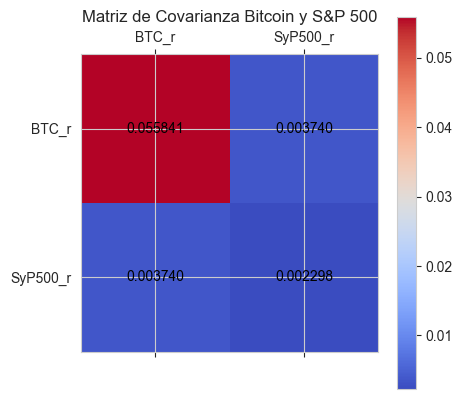

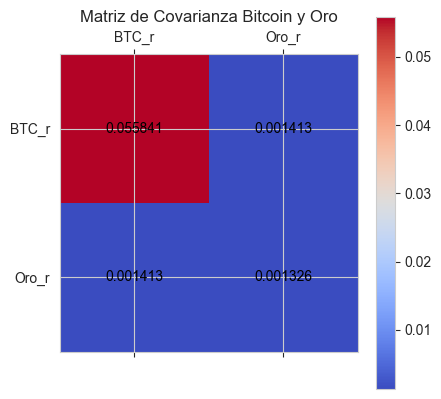

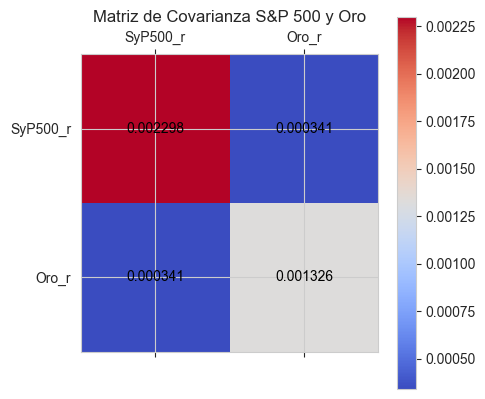

In [112]:
cov_matrix_btc_sp500 = rend_m[['BTC_r', 'SyP500_r']].cov()


sns.set_style("whitegrid")# Graficar la matriz de covarianza con valores dentro de las casillas
plt.matshow(cov_matrix_btc_sp500, cmap='coolwarm')
for i in range(cov_matrix_btc_sp500.shape[0]):
    for j in range(cov_matrix_btc_sp500.shape[1]):
        plt.text(j, i, f'{cov_matrix_btc_sp500.iloc[i, j]:.6f}', ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(len(cov_matrix_btc_sp500.columns)), cov_matrix_btc_sp500.columns)
plt.yticks(range(len(cov_matrix_btc_sp500.columns)), cov_matrix_btc_sp500.columns)
plt.title('Matriz de Covarianza Bitcoin y S&P 500')
plt.show()

cov_matrix_btc_oro = rend_m[['BTC_r', 'Oro_r']].cov()

# Graficar la matriz de covarianza con valores dentro de las casillas
sns.set_style("whitegrid")
plt.matshow(cov_matrix_btc_oro, cmap='coolwarm')
for i in range(cov_matrix_btc_oro.shape[0]):
    for j in range(cov_matrix_btc_oro.shape[1]):
        plt.text(j, i, f'{cov_matrix_btc_oro.iloc[i, j]:.6f}', ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(len(cov_matrix_btc_oro.columns)), cov_matrix_btc_oro.columns)
plt.yticks(range(len(cov_matrix_btc_oro.columns)), cov_matrix_btc_oro.columns)
plt.title('Matriz de Covarianza Bitcoin y Oro')
plt.show()

cov_matrix_sp500_oro = rend_m[['SyP500_r', 'Oro_r']].cov()

# Graficar la matriz de covarianza con valores dentro de las casillas
sns.set_style("whitegrid")
plt.matshow(cov_matrix_sp500_oro, cmap='coolwarm')
for i in range(cov_matrix_sp500_oro.shape[0]):
    for j in range(cov_matrix_sp500_oro.shape[1]):
        plt.text(j, i, f'{cov_matrix_sp500_oro.iloc[i, j]:.6f}', ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(len(cov_matrix_sp500_oro.columns)), cov_matrix_sp500_oro.columns)
plt.yticks(range(len(cov_matrix_sp500_oro.columns)), cov_matrix_sp500_oro.columns)
plt.title('Matriz de Covarianza S&P 500 y Oro')
plt.show()


In [87]:


# Función para calcular el rendimiento y riesgo de un portafolio
def calcular_portafolio(pesos, rendimientos_esperados, cov_matrix):
    rendimiento_portafolio = np.dot(pesos, rendimientos_esperados)
    riesgo_portafolio = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))
    return rendimiento_portafolio, riesgo_portafolio

# Portafolio Bitcoin y S&P 500
print("Portafolio Bitcoin y S&P 500:")
pesos_btc_sp500 = np.arange(0, 1.01, 0.01)
rendimientos_btc_sp500 = []
riesgos_btc_sp500 = []
for peso_btc in pesos_btc_sp500:
    peso_sp500 = 1 - peso_btc
    rendimiento, riesgo = calcular_portafolio(np.array([peso_btc, peso_sp500]), 
                                              [esp_Btc_m, esp_SP500_m], 
                                              cov_matrix_btc_sp500)
    rendimientos_btc_sp500.append(rendimiento)
    riesgos_btc_sp500.append(riesgo)
tabla_btc_sp500 = pd.DataFrame({'Peso Bitcoin': pesos_btc_sp500, 
                               'Peso S&P 500': 1 - pesos_btc_sp500,
                               'Rendimiento': rendimientos_btc_sp500, 
                               'Riesgo': riesgos_btc_sp500})
print(tabla_btc_sp500)

# Portafolio Bitcoin y Oro 
print("\nPortafolio Bitcoin y Oro:")
pesos_btc_oro = np.arange(0, 1.01, 0.01)
rendimientos_btc_oro = []
riesgos_btc_oro = []
for peso_btc in pesos_btc_oro:
    peso_oro = 1 - peso_btc
    rendimiento, riesgo = calcular_portafolio(np.array([peso_btc, peso_oro]),
                                              [esp_Btc_m, esp_Oro_m],
                                              cov_matrix_btc_oro)
    rendimientos_btc_oro.append(rendimiento)
    riesgos_btc_oro.append(riesgo)
tabla_btc_oro = pd.DataFrame({'Peso Bitcoin': pesos_btc_oro,
                              'Peso Oro': 1 - pesos_btc_oro, 
                              'Rendimiento': rendimientos_btc_oro,
                              'Riesgo': riesgos_btc_oro})
print(tabla_btc_oro)




Portafolio Bitcoin y S&P 500:
     Peso Bitcoin  Peso S&P 500  Rendimiento    Riesgo
0            0.00          1.00     0.010613  0.047940
1            0.01          0.99     0.011239  0.048292
2            0.02          0.98     0.011866  0.048746
3            0.03          0.97     0.012493  0.049298
4            0.04          0.96     0.013119  0.049946
..            ...           ...          ...       ...
96           0.96          0.04     0.070772  0.227495
97           0.97          0.03     0.071399  0.229696
98           0.98          0.02     0.072025  0.231899
99           0.99          0.01     0.072652  0.234102
100          1.00          0.00     0.073279  0.236307

[101 rows x 4 columns]

Portafolio Bitcoin y Oro:
     Peso Bitcoin  Peso Oro  Rendimiento    Riesgo
0            0.00      1.00     0.008297  0.036421
1            0.01      0.99     0.008947  0.036519
2            0.02      0.98     0.009596  0.036765
3            0.03      0.97     0.010246  0.037156
4   

In [88]:
import cvxpy as cp

# Definir los rendimientos esperados y la matriz de covarianza
rendimientos_esperados_btc_sp500 = np.array([esp_Btc_m, esp_SP500_m])
cov_matrix_btc_sp500 = cov_matrix_btc_sp500.to_numpy()

# Definir las variables de optimización
pesos = cp.Variable(2)
rendimiento_portafolio = pesos @ rendimientos_esperados_btc_sp500
riesgo_portafolio = cp.quad_form(pesos, cov_matrix_btc_sp500)

# Definir el problema de optimización
prob = cp.Problem(cp.Maximize(rendimiento_portafolio), 
                   [cp.sum(pesos) == 1, pesos >= 0])

# Resolver el problema
prob.solve()

# Mostrar los resultados
print("Portafolio Bitcoin y S&P 500:")
print("Pesos óptimos:", pesos.value)
print("Rendimiento esperado del portafolio:", rendimiento_portafolio.value)
print("Riesgo del portafolio (desviación estándar):", np.sqrt(riesgo_portafolio.value))




Portafolio Bitcoin y S&P 500:
Pesos óptimos: [9.99999997e-01 2.73024205e-09]
Rendimiento esperado del portafolio: 0.07327865697629657
Riesgo del portafolio (desviación estándar): 0.23630663190640186


In [89]:
# Definir los rendimientos esperados y la matriz de covarianza
rendimientos_esperados_btc_oro = np.array([esp_Btc_m, esp_Oro_m])
cov_matrix_btc_oro = cov_matrix_btc_oro.to_numpy()

# Definir las variables de optimización
pesos = cp.Variable(2)
rendimiento_portafolio = pesos @ rendimientos_esperados_btc_oro
riesgo_portafolio = cp.quad_form(pesos, cov_matrix_btc_oro)

# Definir el problema de optimización
prob = cp.Problem(cp.Maximize(rendimiento_portafolio), 
                   [cp.sum(pesos) == 1, pesos >= 0])

# Resolver el problema
prob.solve()

# Mostrar los resultados
print("\nPortafolio Bitcoin y Oro:")
print("Pesos óptimos:", pesos.value)
print("Rendimiento esperado del portafolio:", rendimiento_portafolio.value)
print("Riesgo del portafolio (desviación estándar):", np.sqrt(riesgo_portafolio.value))



Portafolio Bitcoin y Oro:
Pesos óptimos: [9.99999997e-01 2.67011679e-09]
Rendimiento esperado del portafolio: 0.07327865697388039
Riesgo del portafolio (desviación estándar): 0.23630663189336798


In [94]:
from pypfopt.efficient_frontier import EfficientFrontier
import math
# Definir los rendimientos esperados y la matriz de covarianza para Bitcoin y S&P 500
expected_stock_returns_btc_sp500 = np.array([esp_Btc_m, esp_SP500_m])
stock_returns_cov_matrix_btc_sp500 = cov_matrix_btc_sp500

# Crear el objeto EfficientFrontier
ef_btc_sp500 = EfficientFrontier(expected_stock_returns_btc_sp500, stock_returns_cov_matrix_btc_sp500, weight_bounds=(0, 1))

# Encontrar los pesos óptimos del portafolio
ratios_btc_sp500 = ef_btc_sp500.min_volatility()
cleaned_ratios_btc_sp500 = pd.Series(ratios_btc_sp500)
cleaned_ratios_btc_sp500.index = ['Bitcoin', 'S&P 500']

# Calcular el rendimiento esperado del portafolio
opt_portfolio_expected_return_btc_sp500 = np.dot(cleaned_ratios_btc_sp500, expected_stock_returns_btc_sp500)

# Calcular la varianza del portafolio
opt_portfolio_var_btc_sp500 = np.dot(cleaned_ratios_btc_sp500, np.dot(stock_returns_cov_matrix_btc_sp500, cleaned_ratios_btc_sp500))

# Calcular el riesgo del portafolio
opt_portfolio_risk_btc_sp500 = math.sqrt(opt_portfolio_var_btc_sp500)

# Mostrar los resultados
print('PORTAFOLIO ÓPTIMO DE MARKOWITZ - Bitcoin y S&P 500:')
print(f'Rendimiento esperado: {opt_portfolio_expected_return_btc_sp500:.4f}')
print(f'Varianza del portafolio: {opt_portfolio_var_btc_sp500:.4f}')
print(f'Riesgo del portafolio: {opt_portfolio_risk_btc_sp500:.4f}')
print('\nDel 100% de tu capital, el modelo sugiere invertir las siguientes proporciones en cada activo:')
display(cleaned_ratios_btc_sp500*100)


PORTAFOLIO ÓPTIMO DE MARKOWITZ - Bitcoin y S&P 500:
Rendimiento esperado: 0.0106
Varianza del portafolio: 0.0023
Riesgo del portafolio: 0.0479

Del 100% de tu capital, el modelo sugiere invertir las siguientes proporciones en cada activo:


Bitcoin    4.356666e-08
S&P 500    1.000000e+02
dtype: float64

In [96]:
data = {
    'SP500': [0.01, 0.02, -0.01, 0.005],
    'Oro': [0.015, 0.01, -0.005, 0.02]
}

# Crear un DataFrame con los datos de los retornos
df = pd.DataFrame(data)

# Calcular la matriz de covarianza
cov_matrix_sp500_oro = df.cov()

# Mostrar la matriz de covarianza
print("Matriz de Covarianza para S&P 500 y Oro:")
print(cov_matrix_sp500_oro)

Matriz de Covarianza para S&P 500 y Oro:
          SP500       Oro
SP500  0.000156  0.000083
Oro    0.000083  0.000117


In [97]:
expected_stock_returns_sp500_oro = np.array([esp_SP500_m, esp_Oro_m])
stock_returns_cov_matrix_sp500_oro = cov_matrix_sp500_oro

# Crear el objeto EfficientFrontier
ef_sp500_oro = EfficientFrontier(expected_stock_returns_sp500_oro, stock_returns_cov_matrix_sp500_oro, weight_bounds=(0, 1))

# Generar el patrón de portafolio variando los pesos
pesos_sp500_oro = np.linspace(0, 1, 101)
rendimientos_sp500_oro = []
riesgos_sp500_oro = []
for peso_sp500 in pesos_sp500_oro:
    peso_oro = 1 - peso_sp500
    rendimiento, riesgo = calcular_portafolio(np.array([peso_sp500, peso_oro]), 
                                              expected_stock_returns_sp500_oro,
                                              stock_returns_cov_matrix_sp500_oro)
    rendimientos_sp500_oro.append(rendimiento)
    riesgos_sp500_oro.append(riesgo)

# Crear el DataFrame con los resultados
tabla_sp500_oro = pd.DataFrame({'Peso S&P 500': pesos_sp500_oro, 
                               'Peso Oro': 1 - pesos_sp500_oro,
                               'Rendimiento': rendimientos_sp500_oro, 
                               'Riesgo': riesgos_sp500_oro})

# Mostrar los resultados
print("Patrón de portafolio S&P 500 y Oro:")
print(tabla_sp500_oro)

Patrón de portafolio S&P 500 y Oro:
     Peso S&P 500  Peso Oro  Rendimiento    Riesgo
0            0.00      1.00     0.008297  0.010801
1            0.01      0.99     0.008320  0.010771
2            0.02      0.98     0.008343  0.010741
3            0.03      0.97     0.008366  0.010713
4            0.04      0.96     0.008389  0.010685
..            ...       ...          ...       ...
96           0.96      0.04     0.010520  0.012271
97           0.97      0.03     0.010543  0.012328
98           0.98      0.02     0.010566  0.012384
99           0.99      0.01     0.010590  0.012442
100          1.00      0.00     0.010613  0.012500

[101 rows x 4 columns]


In [98]:
expected_stock_returns_sp500_oro = np.array([esp_SP500_m, esp_Oro_m])
stock_returns_cov_matrix_sp500_oro = cov_matrix_sp500_oro

# Crear el objeto EfficientFrontier
ef_sp500_oro = EfficientFrontier(expected_stock_returns_sp500_oro, stock_returns_cov_matrix_sp500_oro, weight_bounds=(0, 1))

# Generar el patrón de portafolio variando los pesos
pesos_sp500_oro = np.linspace(0, 1, 101)
rendimientos_sp500_oro = []
riesgos_sp500_oro = []
for peso_sp500 in pesos_sp500_oro:
    peso_oro = 1 - peso_sp500
    rendimiento, riesgo = calcular_portafolio(np.array([peso_sp500, peso_oro]), 
                                              expected_stock_returns_sp500_oro,
                                              stock_returns_cov_matrix_sp500_oro)
    rendimientos_sp500_oro.append(rendimiento)
    riesgos_sp500_oro.append(riesgo)

# Crear el DataFrame con los resultados
tabla_sp500_oro = pd.DataFrame({'Peso S&P 500': pesos_sp500_oro, 
                               'Peso Oro': 1 - pesos_sp500_oro,
                               'Rendimiento': rendimientos_sp500_oro, 
                               'Riesgo': riesgos_sp500_oro})

# Mostrar los resultados
print("Patrón de portafolio S&P 500 y Oro:")
print(tabla_sp500_oro)

Patrón de portafolio S&P 500 y Oro:
     Peso S&P 500  Peso Oro  Rendimiento    Riesgo
0            0.00      1.00     0.008297  0.010801
1            0.01      0.99     0.008320  0.010771
2            0.02      0.98     0.008343  0.010741
3            0.03      0.97     0.008366  0.010713
4            0.04      0.96     0.008389  0.010685
..            ...       ...          ...       ...
96           0.96      0.04     0.010520  0.012271
97           0.97      0.03     0.010543  0.012328
98           0.98      0.02     0.010566  0.012384
99           0.99      0.01     0.010590  0.012442
100          1.00      0.00     0.010613  0.012500

[101 rows x 4 columns]


In [100]:

# Crear una copia de tabla_btc_sp500 para evitar modificar el original
df1 = tabla_btc_sp500.copy()

# Renombrar las columnas de tabla_btc_oro
tabla_btc_oro.columns = ['Peso Bitcoin 2', 'Peso Oro 2', 'Rendimiento 2', 'Riesgo 2']

# Renombrar las columnas de tabla_sp500_oro
tabla_sp500_oro.columns = ['Peso S&P 500 3', 'Peso Oro 3', 'Rendimiento 3', 'Riesgo 3']

# Concatenar las DataFrames horizontalmente
df_final = pd.concat([df1, tabla_btc_oro, tabla_sp500_oro], axis=1)

# Mostrar la DataFrame final
display(df_final)


,Peso Bitcoin,Peso S&P 500,Rendimiento,Riesgo,Peso Bitcoin 2,Peso Oro 2,Rendimiento 2,Riesgo 2,Peso S&P 500 3,Peso Oro 3,Rendimiento 3,Riesgo 3
0,0.00,1.00,0.010613,0.047940,0.00,1.00,0.008297,0.036421,0.00,1.00,0.008297,0.010801
1,0.01,0.99,0.011239,0.048292,0.01,0.99,0.008947,0.036519,0.01,0.99,0.008320,0.010771
2,0.02,0.98,0.011866,0.048746,0.02,0.98,0.009596,0.036765,0.02,0.98,0.008343,0.010741
3,0.03,0.97,0.012493,0.049298,0.03,0.97,0.010246,0.037156,0.03,0.97,0.008366,0.010713
4,0.04,0.96,0.013119,0.049946,0.04,0.96,0.010896,0.037687,0.04,0.96,0.008389,0.010685
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.04,0.070772,0.227495,0.96,0.04,0.070679,0.227098,0.96,0.04,0.010520,0.012271
97,0.97,0.03,0.071399,0.229696,0.97,0.03,0.071329,0.229399,0.97,0.03,0.010543,0.012328
98,0.98,0.02,0.072025,0.231899,0.98,0.02,0.071979,0.231701,0.98,0.02,0.010566,0.012384
99,0.99,0.01,0.072652,0.234102,0.99,0.01,0.072629,0.234004,0.99,0.01,0.010590,0.012442


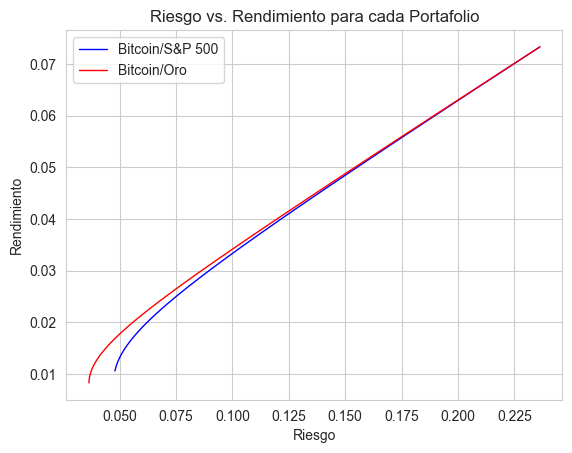

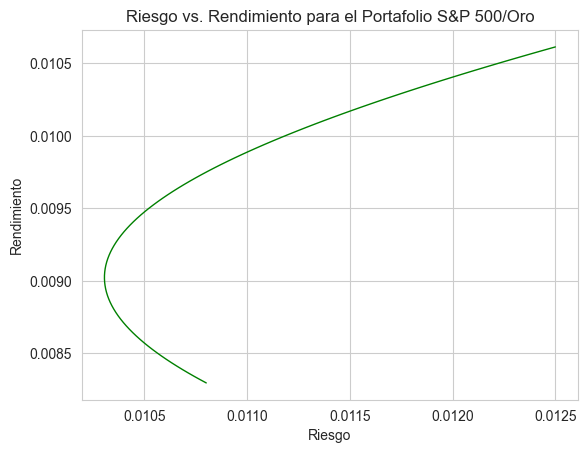

In [110]:


# Establecer el estilo de seaborn a "whitegrid"
sns.set_style("whitegrid")
fig, ax = plt.subplots()

# Graficar el riesgo vs. rendimiento para el portafolio Bitcoin/S&P 500 como línea
ax.plot(df_final['Riesgo'], df_final['Rendimiento'], label='Bitcoin/S&P 500', color='blue', linewidth=1)

# Graficar el riesgo 2 vs. rendimiento 2 para el portafolio Bitcoin/Oro como línea
ax.plot(df_final['Riesgo 2'], df_final['Rendimiento 2'], label='Bitcoin/Oro', color='red', linewidth=1)



# Configurar el gráfico
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.title('Riesgo vs. Rendimiento para cada Portafolio')
plt.legend()
plt.grid(True)
plt.show()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar el riesgo 3 vs. rendimiento 3 para el portafolio S&P 500/Oro
ax.plot(df_final['Riesgo 3'], df_final['Rendimiento 3'], color='green', linewidth=1)

# Configurar el gráfico
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.title('Riesgo vs. Rendimiento para el Portafolio S&P 500/Oro')
plt.grid(True)
plt.show()

